In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore' , message = 'bhag yaha se')

In [82]:
#we Read the Dataset
df = pd.read_csv("C:\\Users\\hs081\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv" , header = 1)

In [83]:
#122 Entires per Region
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [84]:
df.loc[[122]] #Above 123 Entires we have the data of Sidi Bel Abbes Region

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [86]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [87]:
df.isna().sum() #checking No of Null values in each column
#i can also use
# df.isnull().sum() #checking No of Null values in each column

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [88]:
#now if i have to find the no of columns having NULL values

In [89]:
[features for features in df.columns if df[features].isna().sum() > 0]

['month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ']

In [90]:
#to find Row having NULL values

In [91]:
df[df.isnull().any(axis = 1)]
#if in any row their is at least 1 NULL value it will return that row along with columns

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [92]:
#to find all Non NULL values
df[~df.isnull().any(axis = 1)]
#i will get all Non Null values by appling ~ sign

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [93]:
df.shape

(246, 14)

In [94]:
df.duplicated().sum() #no Duplicates in the Dataset

0

In [95]:
#NoW Lets Start Data Cleaning

In [96]:
df
#We have 2 Regions So for Difference between them we will make a new columns Region so that so that they can be
#differentiated

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [97]:
df.loc[ : 121, 'Region'] = 1

In [98]:
df.loc[122: , 'Region' ] = 0

In [99]:
df['Region'] = df['Region'].astype(int)

In [100]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [101]:
#Column Renaming

In [102]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [103]:
#By using Strip Function

In [104]:
df.columns = df.columns.str.strip()

In [105]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [106]:
#by using Rename Funciton but i requires Mapping

In [107]:
# df.rename(columns = {' RH' :'RH' , ' Ws' : 'Ws' , 'Rain ' : 'Rain' ,'Classes  ' : 'Classes'} , inplace = True)

In [108]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [109]:
#Data Cleaning

In [110]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [111]:
df.loc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0


In [112]:
df.drop(122 , axis = 0 , inplace = True)

In [113]:
df.drop(123, axis = 0 , inplace = True)

In [114]:
df.reset_index()
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0


In [115]:
df.dropna(inplace = True)

In [116]:
#Data Preprocessing and Columns Encoding

In [117]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [118]:
df[['day' , 'month' , 'year' , 'Temperature' , 'RH' , 'Ws']] = df[['day' , 'month' , 'year' , 'Temperature' , 'RH' , 'Ws']].astype(int)

In [119]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [120]:
df[['Rain', 'FFMC', 'DMC' ,'DC' ,'ISI','BUI' ,'FWI']] = df[['Rain', 'FFMC', 'DMC' ,'DC' ,'ISI','BUI','FWI']].astype(float)

In [121]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [122]:
#Now Encoding of Classes Column
#by Simply Mapping

In [123]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [124]:
df['Classes'] = df['Classes'].str.strip()

In [125]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [126]:
df['Classes'] = df['Classes'].map({'fire' : 1 , 'not fire' : 0})

In [127]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [128]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int32
dtype: object

In [129]:
#Now Data Encoding , preprocssing and Cleaning is Done

In [130]:
#NOW We do EDA

In [131]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.502058
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [132]:
#Now we will divide into 2 Regions

In [133]:
df[:122] #bajaia Region

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,1


In [134]:
df[122:] #sidi bel region

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,0
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,0
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,0
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,0
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [135]:
#Now We store this dataset into a new file

In [136]:
df.to_csv('Alegerian Fire Dataset Cleaned.csv' , index = False)

In [137]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int32
dtype: object

In [138]:
df.drop(['day' , 'month' , 'year'] , axis = 1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [139]:
df1 = df

In [140]:
df1.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int32
dtype: object

In [141]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [142]:
df.Classes.value_counts()
#this data set  is balanced
#from the Month of June to Sep , Rate of Fire is more as compare to Rate of not fire

1    137
0    106
Name: Classes, dtype: int64

In [143]:
df.Classes.value_counts()[0] / len(df.Classes)

0.43621399176954734

In [144]:
df.Classes.value_counts()[1] / len(df.Classes)

0.5637860082304527

In [145]:
#visulaization

<AxesSubplot:ylabel='Classes'>

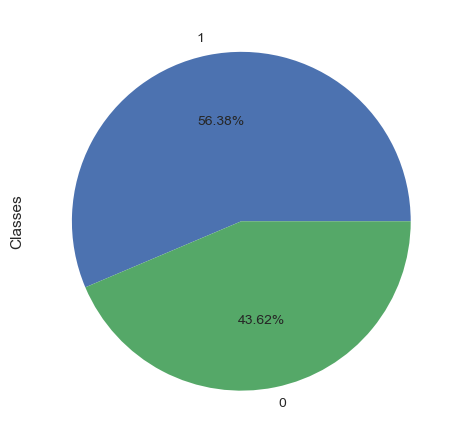

In [146]:
df.Classes.value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

In [147]:
#Advance Visualization

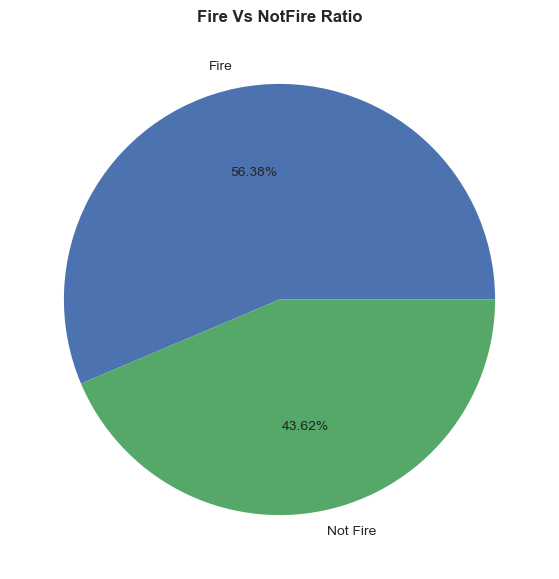

In [148]:
plt.rcParams['figure.figsize'] = (15,7)
percentage = df['Classes'].value_counts()
Class_labels = ['Fire' , 'Not Fire']
plt.pie(x = percentage , labels= Class_labels , autopct = '%0.2f%%')
plt.title("Fire Vs NotFire Ratio" , fontsize = 12 , weight = 'bold')
plt.show()

ValueError: num must be 1 <= num <= 9, not 10

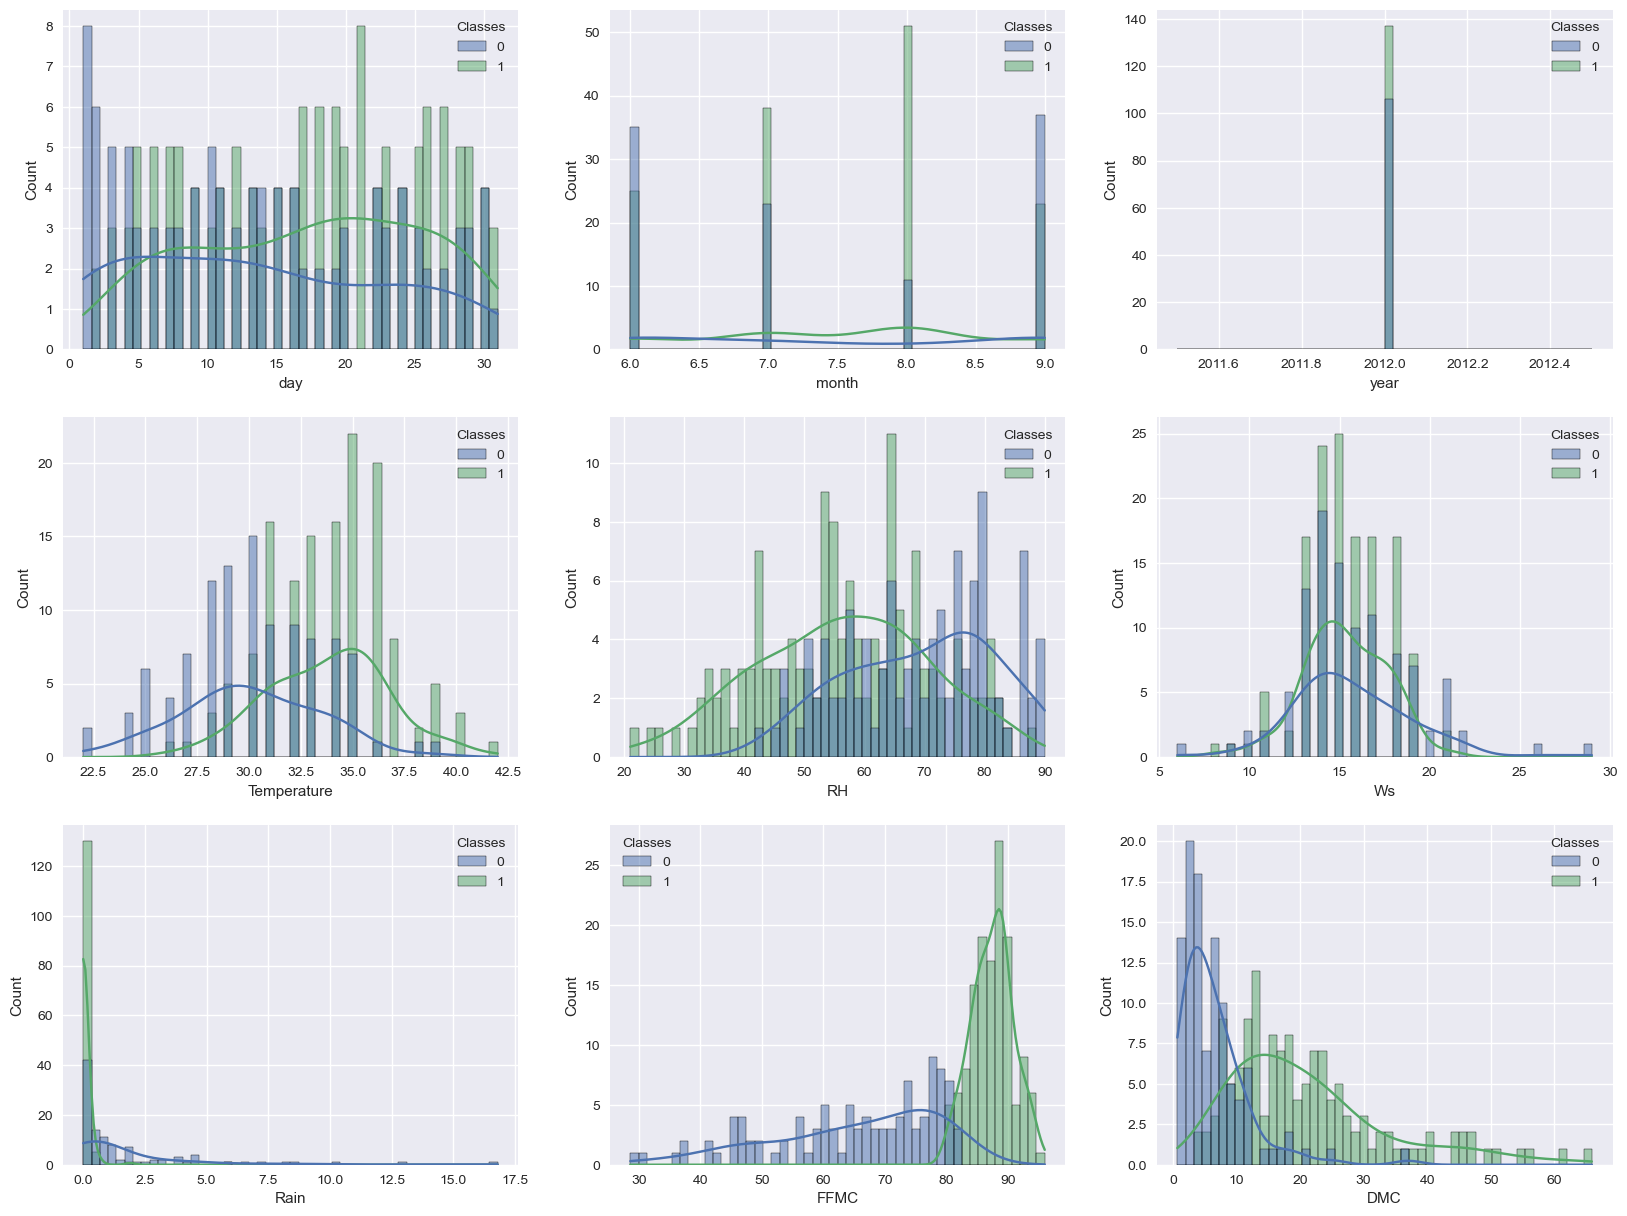

In [149]:
plt.style.use('seaborn')
plt.subplots(3 , 3 , figsize=(20,15))
row = column = 3
start = 1;
for i in df1.columns:
    if(i != 'Classes'):
        plt.subplot(row , column , start)
        sns.histplot(x = i , data = df , kde = True , hue = 'Classes' , bins = 50)
    start = start + 1
#we are making a histogram and Density plot for all the indiviudal Features

In [150]:
df['Temperature'].skew()

-0.19132732849056694

<AxesSubplot:>

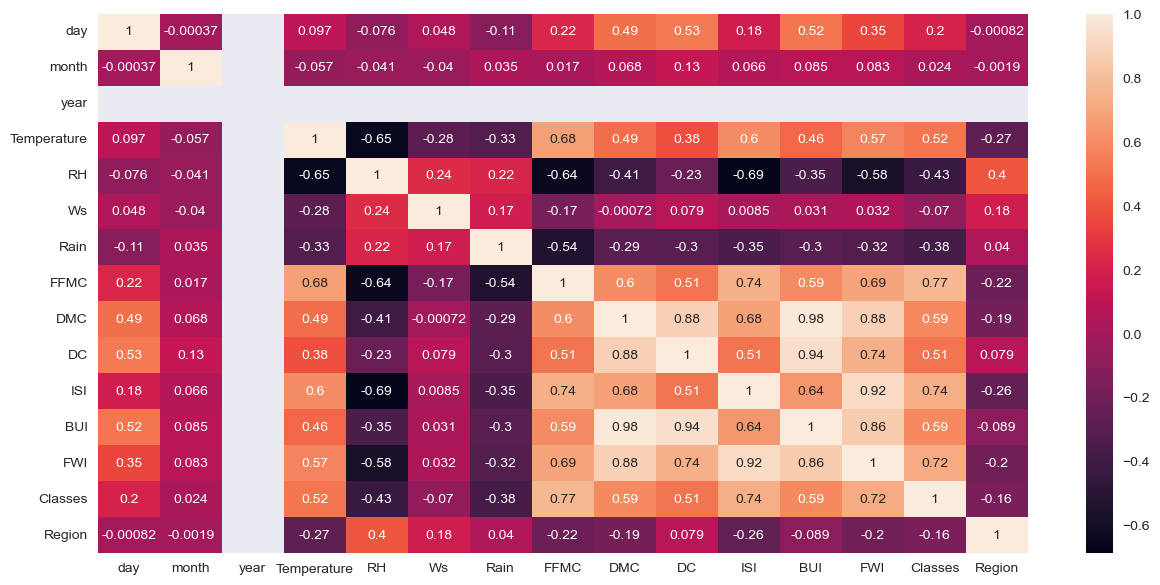

In [155]:
#Multicollinearity
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr() , annot = True)

In [156]:
#FWI can be use for model Traning

In [157]:
#Cheching for outliers in the FWI column

Text(0.5, 0, 'FWI')

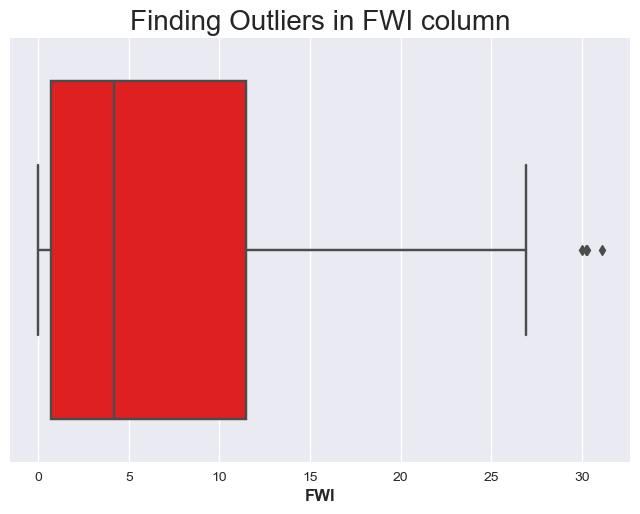

In [158]:
sns.boxplot(x = 'FWI' , data = df1 ,color ='red')
plt.title("Finding Outliers in FWI column" , fontsize= 20)
plt.xlabel("FWI" , fontsize = 12 ,  weight = 'bold')

In [159]:
#Now lets check the monthwise Analysis of Fire For each Region

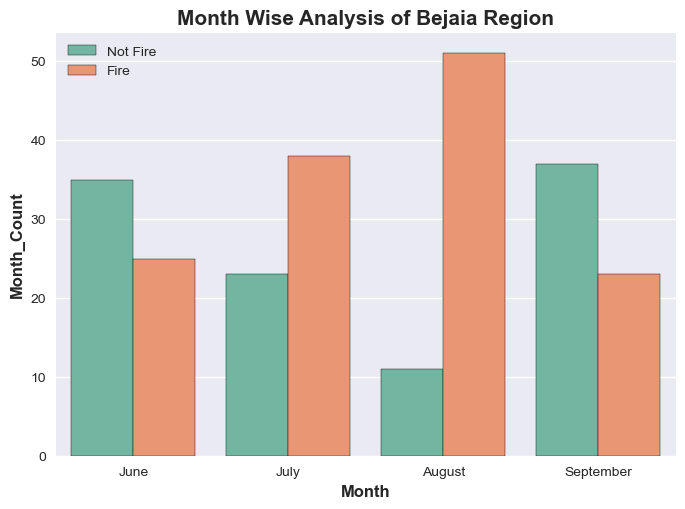

In [171]:
plt.style.use('seaborn')
df_temp = df[df['Region'] == 1]
sns.countplot(x = 'month' , hue=  'Classes' , data = df, ec ='black' , palette = 'Set2' )
plt.title('Month Wise Analysis of Bejaia Region' ,  fontsize = 15 , weight = 'bold')
plt.xlabel('Month' , fontsize =12, weight = 'bold')
plt.ylabel('Month_Count' , fontsize =12, weight = 'bold')
plt.legend(loc = 'upper left' , labels = ['Not Fire' , 'Fire'])
plt.xticks(np.arange(4) , ['June','July','August','September'])
plt.show() 

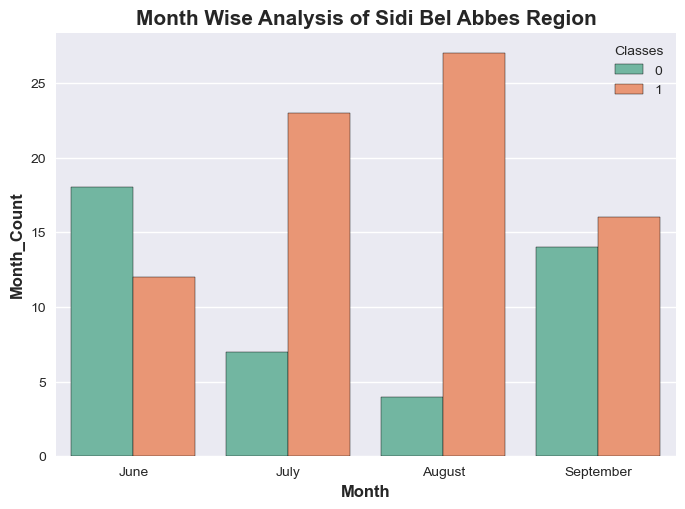

In [161]:
df_temp= df[df['Region'] == 0]
plt.style.use('seaborn')
sns.countplot(x = 'month', hue = 'Classes' , data = df_temp , palette = 'Set2' , ec  = 'black')
plt.title('Month Wise Analysis of Sidi Bel Abbes Region' , fontsize  = 15 , weight = 'bold')
plt.xlabel('Month' , fontsize = 12, weight = 'bold')
plt.ylabel('Month_Count' , fontsize = 12, weight = 'bold')
plt.xticks(np.arange(4),['June' , 'July' , 'August' , 'September'])
plt.show()

In [405]:
#Now Lets Observe Through This Graph

# Observation
In the Month of August Most Fire is Captured in both the regions

In  the month of July , August their is fire in both regions

In the Month of june , Sep their is less Fire in the forest in both regions

In [416]:
#Use of GroupBy function and getting Data of Monthwise Count of Classes(fire and not fire)
df_temp = df[df['Region'] == 1]
df_temp.groupby('month')['Classes'].value_counts()

month  Classes
6      0          17
       1          13
7      0          16
       1          15
8      1          24
       0           7
9      0          23
       1           7
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

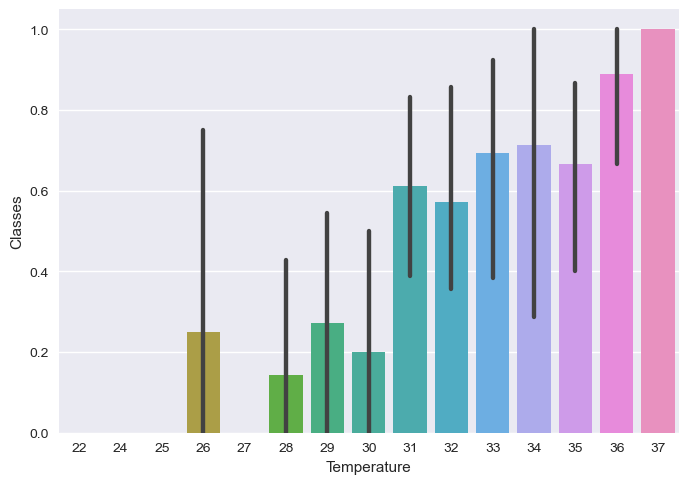

In [175]:
sns.barplot(x = 'Temperature' , y = 'Classes' , data = df[:122])

In [176]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,1


In [177]:
df_featues = df.groupby('Temperature', as_index = False)['Classes'].sum()

In [178]:
df_featues

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

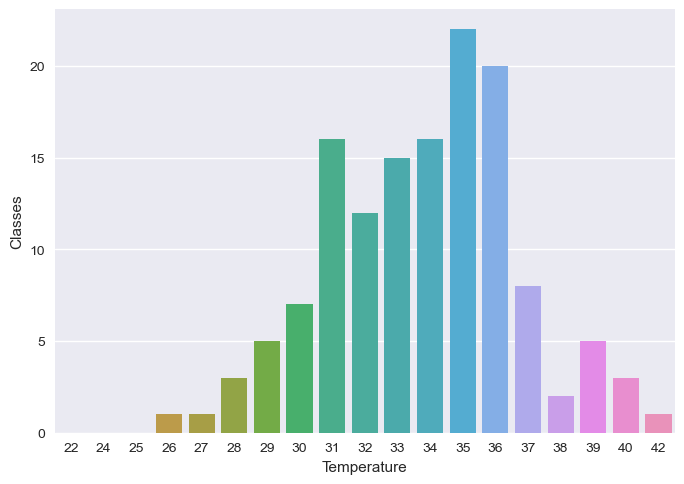

In [179]:
sns.barplot(x = 'Temperature' , y = 'Classes' , data = df_featues)

In [180]:
# sns.catplot(x = 'Temperature' , hue = 'Classes' , data = df)

In [462]:
df['Temperature'].unique()

array([29, 26, 25, 27, 31, 33, 30, 28, 32, 34, 35, 36, 37, 22, 24, 38, 39,
       40, 42])

In [181]:
df['Temperature'].isna().sum()

0

In [183]:
# sns.barplot(x = 'Temperature', y = 'Classes' , data = df)

<AxesSubplot:xlabel='Temperature', ylabel='count'>

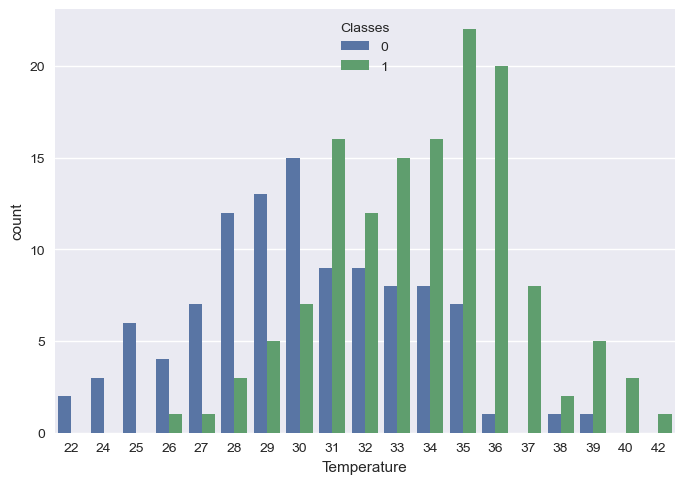

In [187]:
sns.countplot( x = 'Temperature' , hue = 'Classes', data = df)

In [474]:
df['Temperature'].value_counts()

35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
27     8
37     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

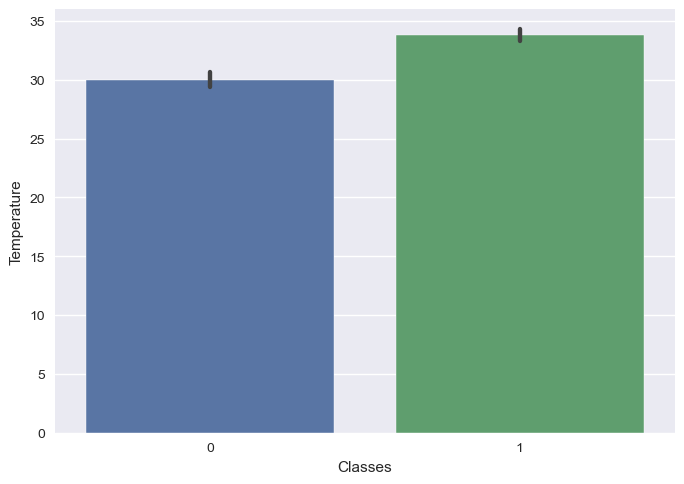

In [477]:
sns.barplot(x = 'Classes' , y = 'Temperature',data = df)

In [482]:
df[df['Classes'] == 1]['Temperature'].sum() / len(df[df['Classes'] == 1]['Temperature'])

33.7956204379562

In [483]:
df[df['Classes'] == 0]['Temperature'].sum() / len(df[df['Classes'] == 0]['Temperature'])

30.028301886792452

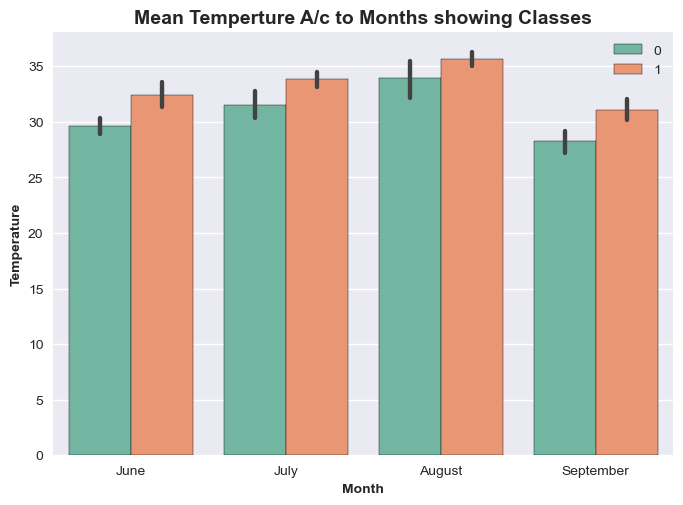

In [496]:
plt.style.use('seaborn')
sns.barplot(x = 'month' , y = 'Temperature',data = df , hue = 'Classes', palette = 'Set2' ,ec = 'black')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4) , ['June' , 'July' , 'August' , 'September'])
plt.title("Mean Temperture A/c to Months showing Classes" , fontsize = 14 , weight = 'bold')
plt.xlabel('Month' , fontsize = 10 , weight = 'bold')
plt.ylabel('Temperature', fontsize = 10 , weight = 'bold')
plt.show()

In [514]:
df.groupby(['Classes', 'month'] , as_index = False)['Temperature'].mean()

,Classes,month,Temperature
0,0,6,29.628571
1,0,7,31.565217
2,0,8,33.909091
3,0,9,28.297297
4,1,6,32.440000
5,1,7,33.842105
6,1,8,35.647059
7,1,9,31.086957


In [520]:
df.month.nunique()

4

In [529]:
 df.groupby(['Temperature'] , as_index = False)['Classes'].value_counts()

,Temperature,Classes,count
0,22,0,2
1,24,0,3
2,25,0,6
3,26,0,4
4,26,1,1
5,27,0,7
6,27,1,1
7,28,0,12
8,28,1,3
9,29,0,13


In [188]:
df_feature = df.groupby(['Temperature'] , as_index = False)['Classes'].sum()

In [189]:
df_feature

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


In [190]:
#hum Use Temperature ko nikal rahe hai jisme subse zada Fire hua hai(count of  Fire)

<AxesSubplot:xlabel='Temperature', ylabel='count'>

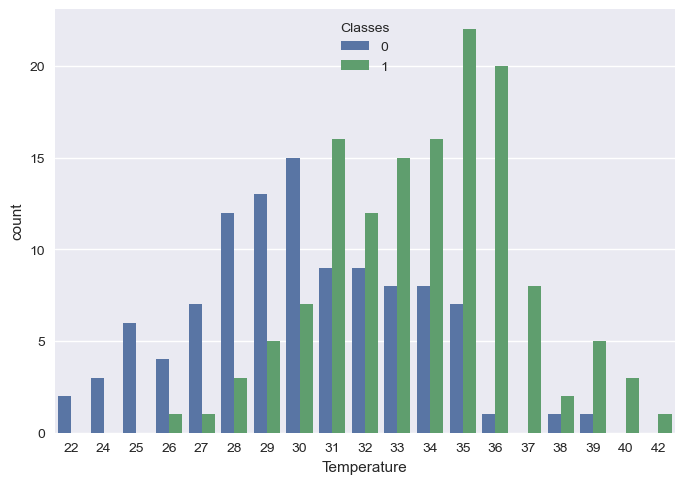

In [191]:
sns.countplot(x ='Temperature' , hue = 'Classes' ,data = df)

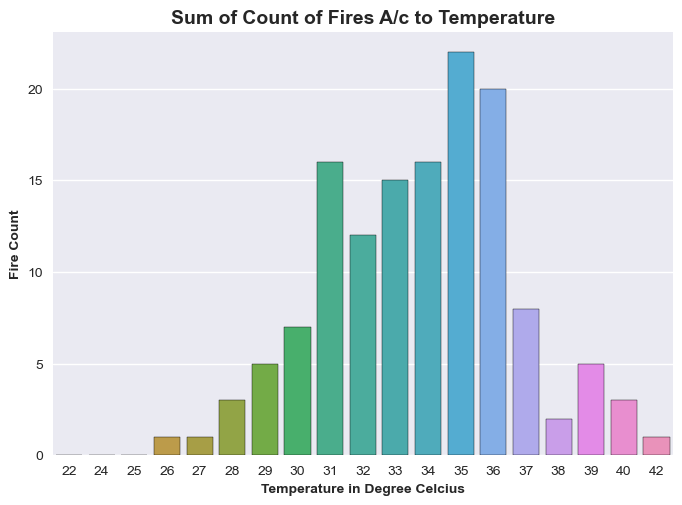

In [192]:
plt.style.use('seaborn')
sns.barplot(x = 'Temperature' , y = 'Classes',data = df_feature  ,ec = 'black')
plt.title("Sum of Count of Fires A/c to Temperature" , fontsize = 14 , weight = 'bold')
plt.xlabel('Temperature in Degree Celcius' , fontsize = 10 , weight = 'bold')
plt.ylabel('Fire Count', fontsize = 10 , weight = 'bold')
plt.show()

In [193]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [194]:
df_feature = df.groupby('Rain', as_index = False)['Classes'].sum()

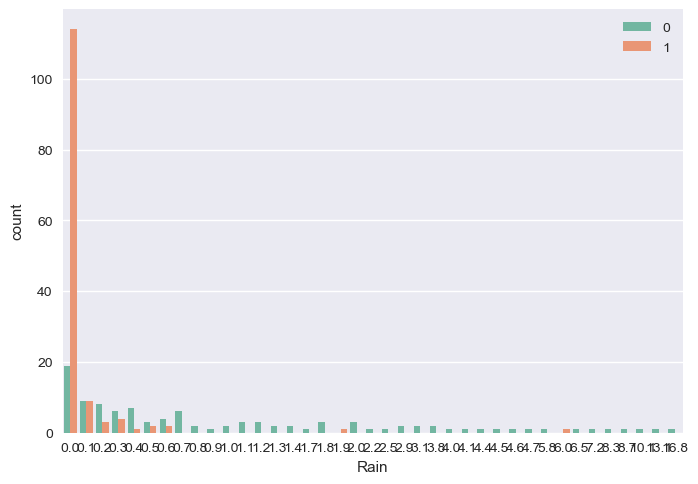

In [195]:
sns.countplot(x = 'Rain' , hue = 'Classes' , data =df  , palette = 'Set2')
plt.legend(loc = 'upper right')

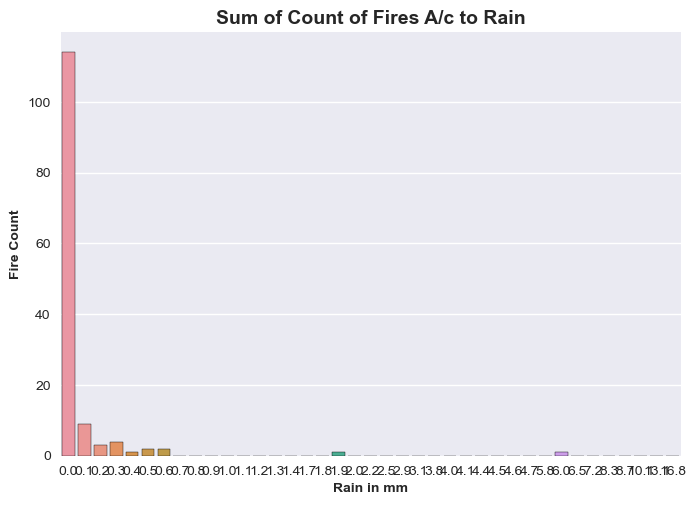

In [196]:
plt.style.use('seaborn')
sns.barplot(x = 'Rain' , y = 'Classes',data = df_feature  ,ec = 'black')
plt.title("Sum of Count of Fires A/c to Rain" , fontsize = 14 , weight = 'bold')
plt.xlabel('Rain in mm' , fontsize = 10 , weight = 'bold')
plt.ylabel('Fire Count', fontsize = 10 , weight = 'bold')
plt.show()

In [197]:
df_feature = df.groupby('Ws', as_index = False)['Classes'].sum()

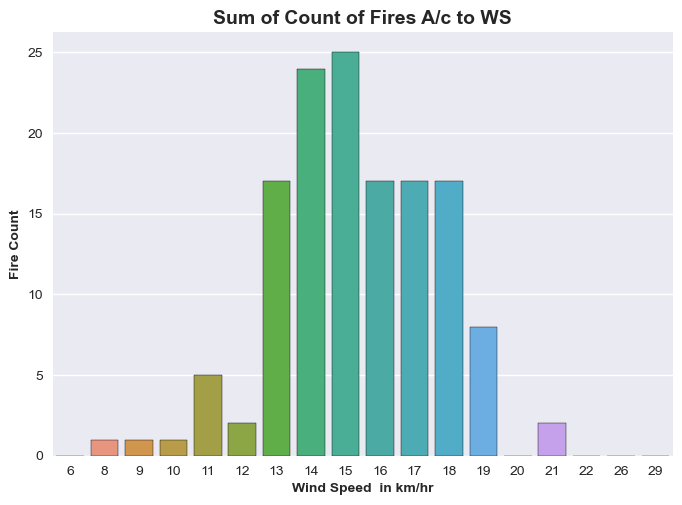

In [198]:
plt.style.use('seaborn')
sns.barplot(x = 'Ws' , y = 'Classes',data = df_feature  ,ec = 'black')
plt.title("Sum of Count of Fires A/c to WS" , fontsize = 14 , weight = 'bold')
plt.xlabel('Wind Speed  in km/hr' , fontsize = 10 , weight = 'bold')
plt.ylabel('Fire Count', fontsize = 10 , weight = 'bold')
plt.show()

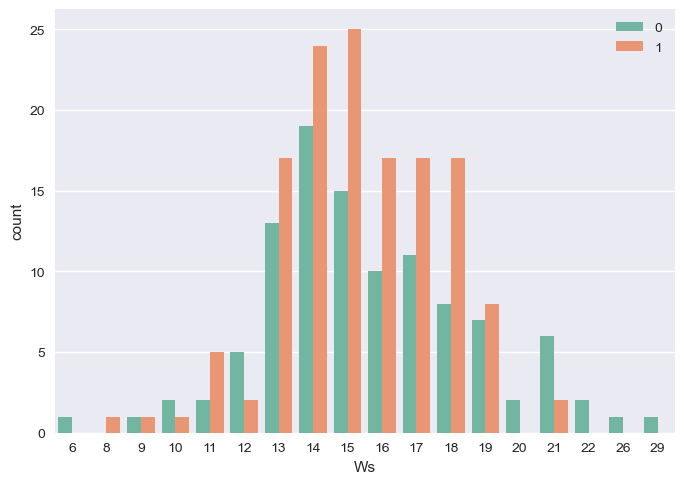

In [199]:
sns.countplot(x = 'Ws' , hue = 'Classes' , data =df  , palette = 'Set2')
plt.legend(loc = 'upper right')

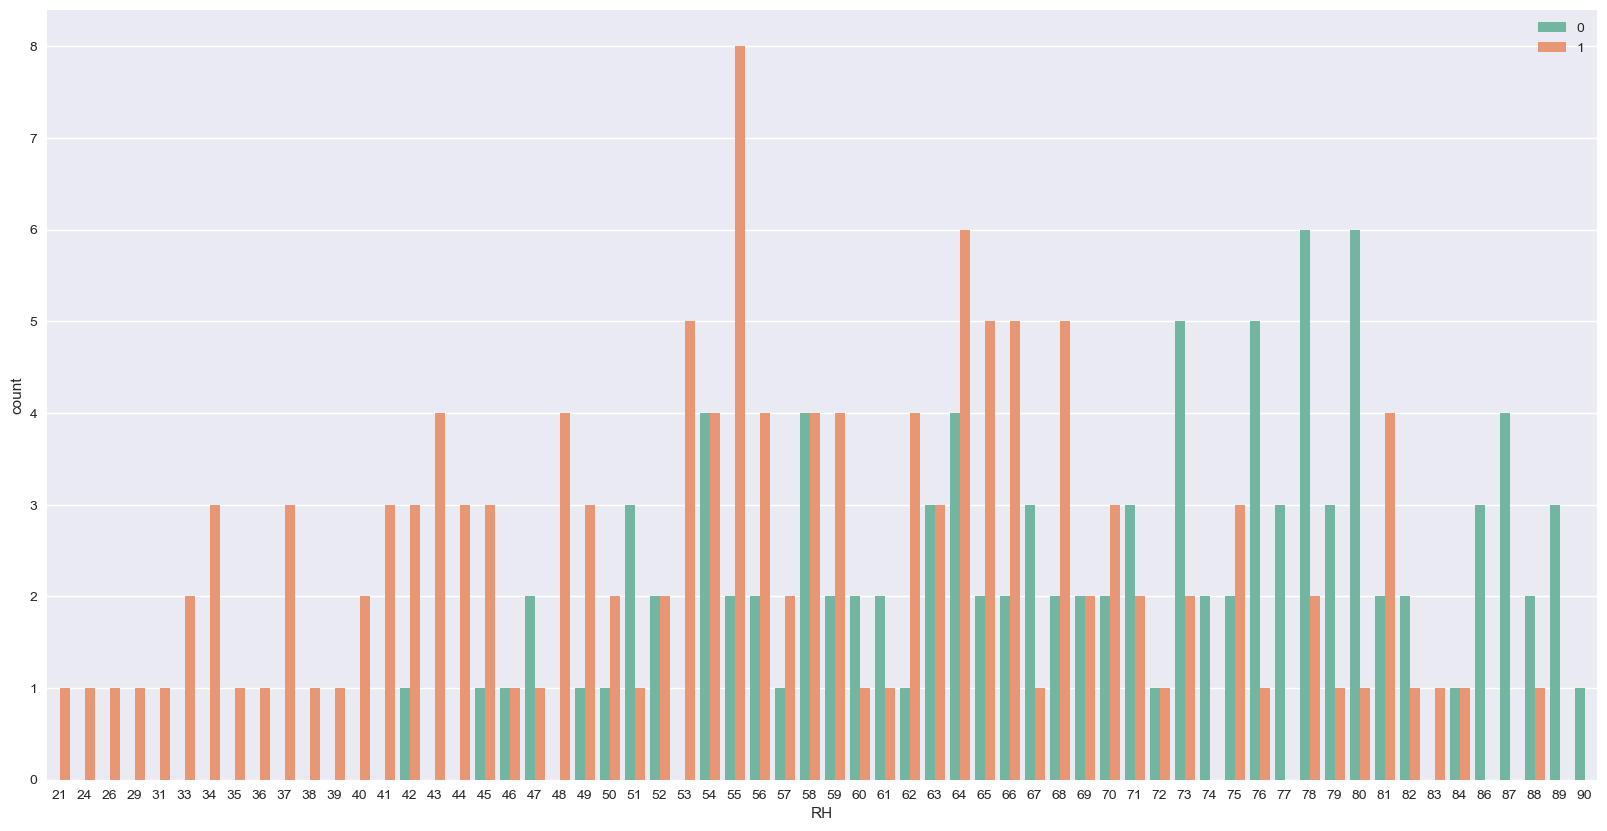

In [200]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'RH' , hue = 'Classes' , data =df  , palette = 'Set2')
plt.legend(loc = 'upper right')

In [201]:
df_feature = df.groupby('RH', as_index = False)['Classes'].sum()

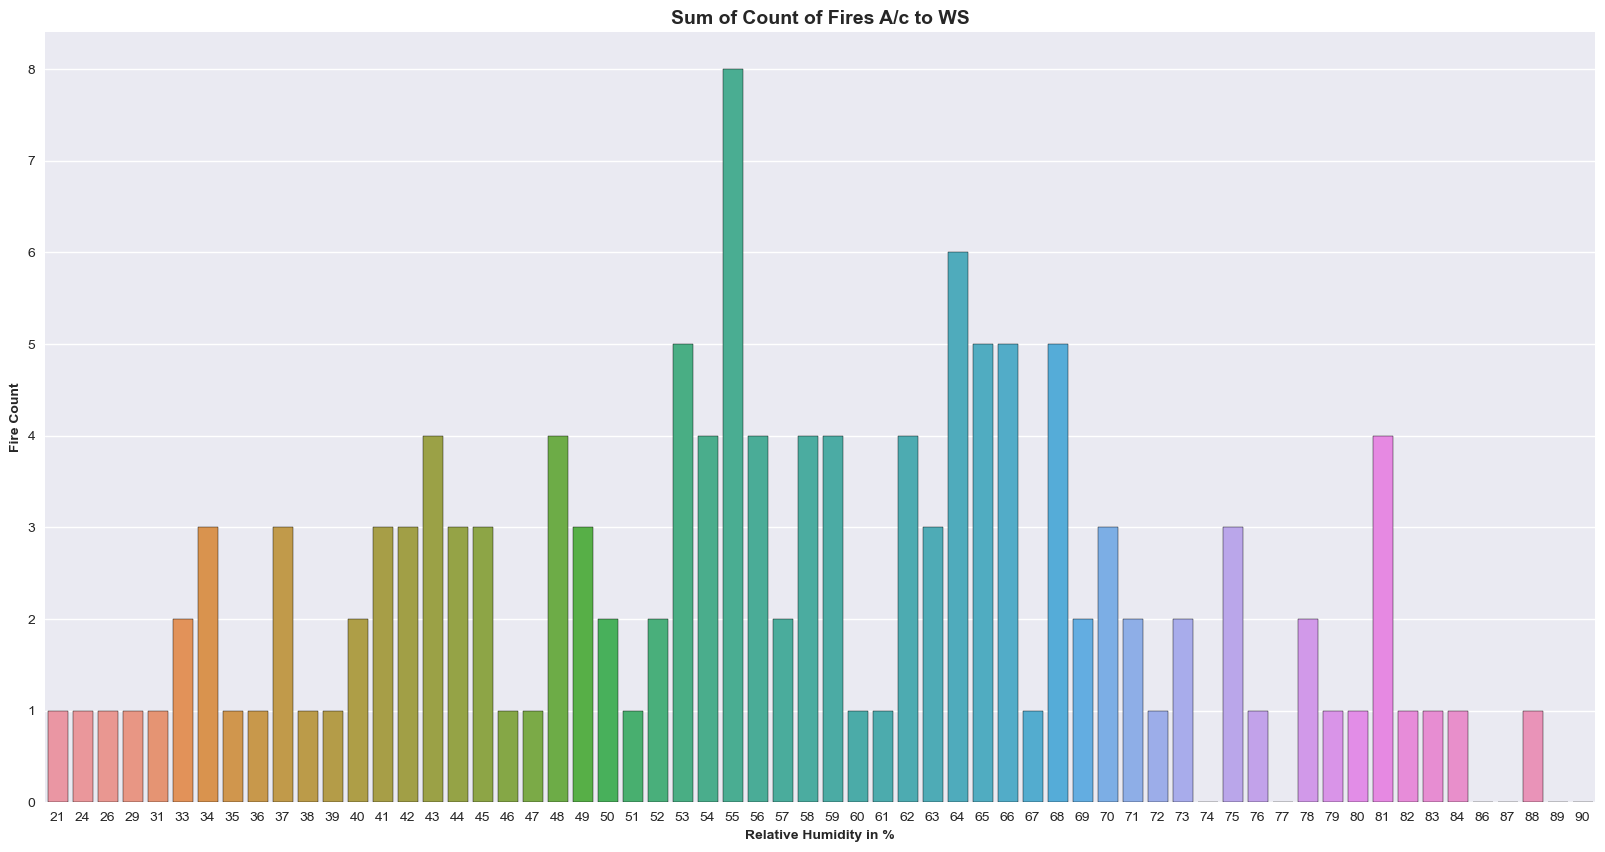

In [202]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
sns.barplot(x = 'RH' , y = 'Classes',data = df_feature  ,ec = 'black')
plt.title("Sum of Count of Fires A/c to WS" , fontsize = 14 , weight = 'bold')
plt.xlabel('Relative Humidity in %' , fontsize = 10 , weight = 'bold')
plt.ylabel('Fire Count', fontsize = 10 , weight = 'bold')
plt.show()

In [203]:
#Now Lets Drawing a box plot because we are basically trying to check Outliers for each column

<AxesSubplot:xlabel='Temperature'>

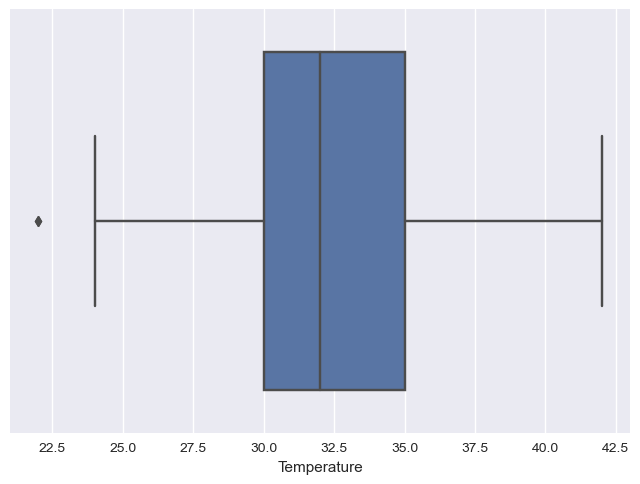

In [204]:
sns.boxplot(x = 'Temperature' , data = df)

In [205]:
#i will use 
df_temp = df.drop(['Classes' , 'Region'] , axis =1)

In [206]:
df_temp = df.drop(['Classes' , 'Region'] , axis = 1)

In [207]:
df_temp

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


<AxesSubplot:>

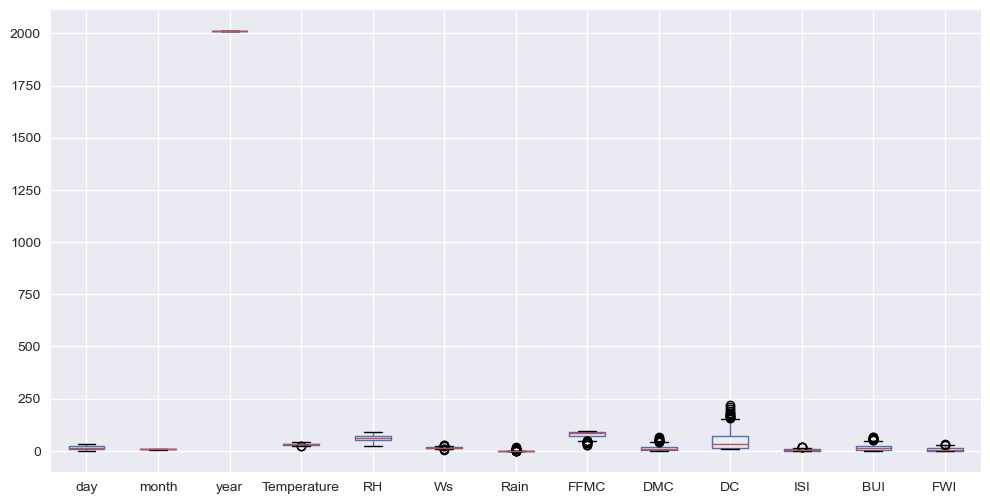

In [209]:
plt.rcParams['figure.figsize'] = (12,6)
df_temp.boxplot()

In [210]:
#Now we will Make histplot for Remaning Features

In [211]:
df_temp = df.drop(['Temperature' , 'RH' , 'Ws', 'Rain', 'Region'] , axis = 1)

In [212]:
df_temp

,day,month,year,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,2012,41.1,6.5,8.0,0.1,6.2,0.0,0
243,28,9,2012,45.9,3.5,7.9,0.4,3.4,0.2,0
244,29,9,2012,79.7,4.3,15.2,1.7,5.1,0.7,0


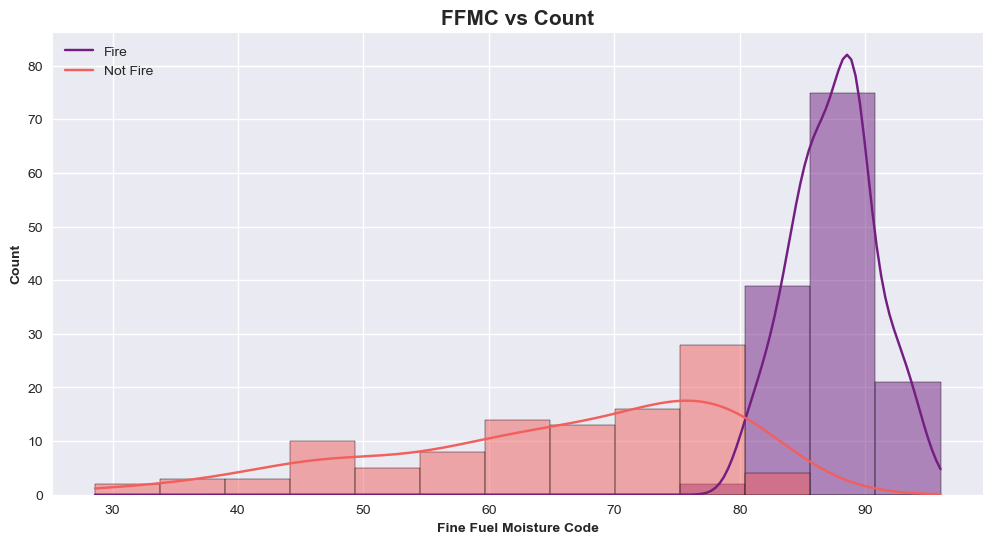

In [213]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'FFMC', hue = 'Classes' , data = df_temp, kde = True , palette = 'magma_r')
plt.title('FFMC vs Count' , weight = 'bold' , fontsize = 15)
plt.legend(loc = 'upper left' , labels = ['Fire' , 'Not Fire'])
plt.xlabel('Fine Fuel Moisture Code' , weight = 'bold' , fontsize = 10)
plt.ylabel('Count' , weight = 'bold' , fontsize = 10)
plt.show()

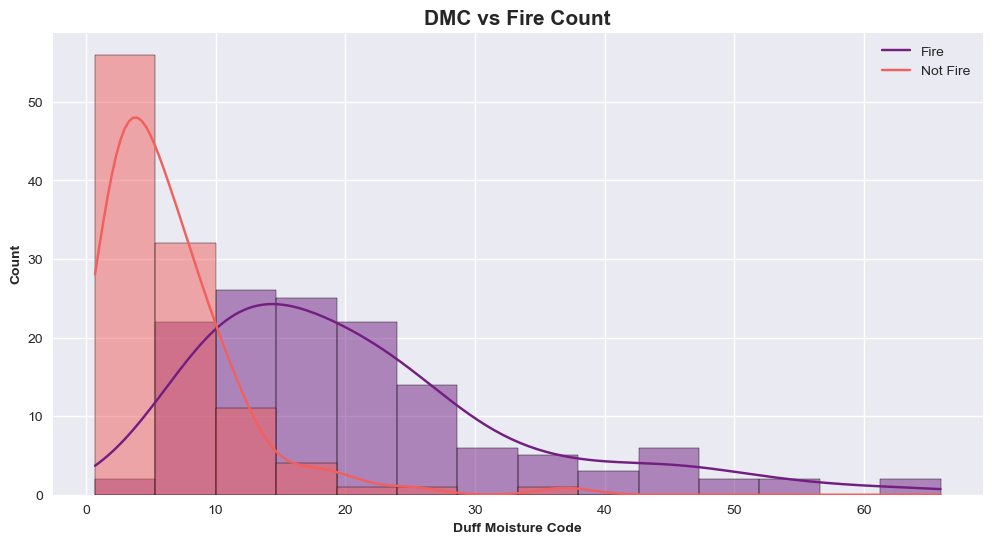

In [214]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'DMC', hue = 'Classes' , data = df_temp, kde = True,  palette = 'magma_r')
plt.title('DMC vs Fire Count' , weight = 'bold' , fontsize = 15)
plt.legend(loc = 'upper right' , labels = ['Fire' , 'Not Fire'])
plt.xlabel('Duff Moisture Code' , weight = 'bold' , fontsize = 10)
plt.ylabel('Count' , weight = 'bold' , fontsize = 10)
plt.show()

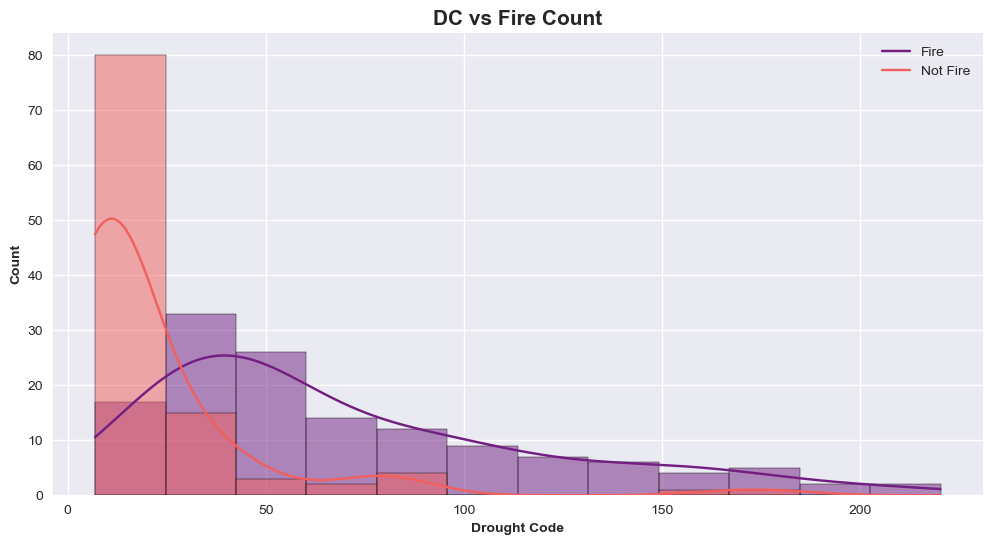

In [215]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'DC', hue = 'Classes' , data = df_temp, kde = True,  palette = 'magma_r')
plt.title('DC vs Fire Count' , weight = 'bold' , fontsize = 15)
plt.legend(loc = 'upper right' , labels = ['Fire' , 'Not Fire'])
plt.xlabel('Drought Code' , weight = 'bold' , fontsize = 10)
plt.ylabel('Count' , weight = 'bold' , fontsize = 10)
plt.show()

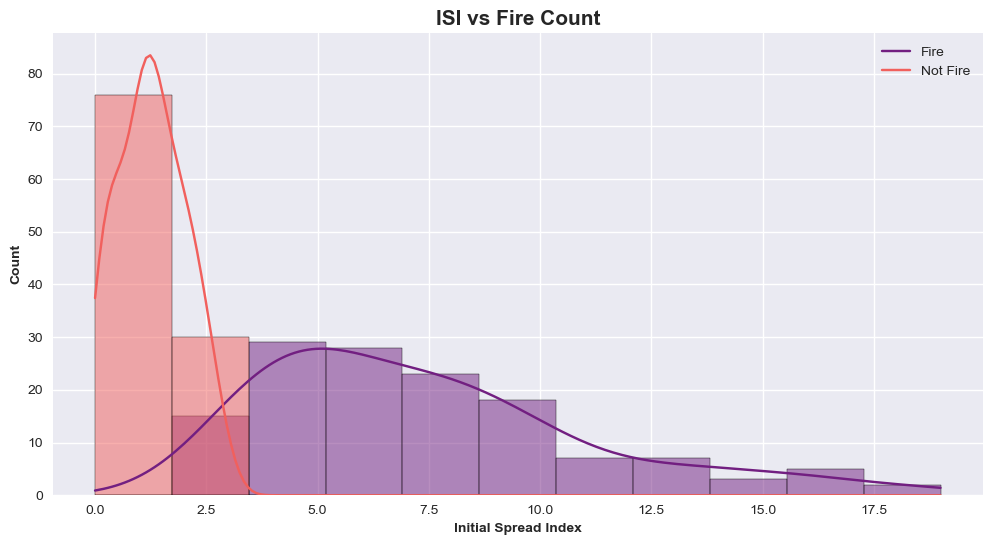

In [216]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'ISI', hue = 'Classes' , data = df_temp, kde = True,  palette = 'magma_r')
plt.title('ISI vs Fire Count' , weight = 'bold' , fontsize = 15)
plt.legend(loc = 'upper right' , labels = ['Fire' , 'Not Fire'])
plt.xlabel('Initial Spread Index' , weight = 'bold' , fontsize = 10)
plt.ylabel('Count' , weight = 'bold' , fontsize = 10)
plt.show()

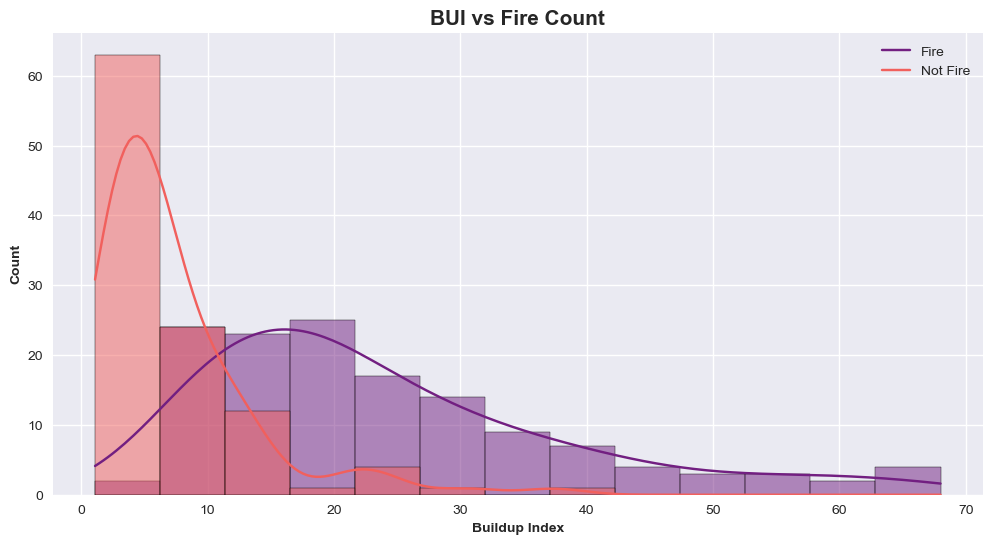

In [217]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'BUI', hue = 'Classes' , data = df_temp, kde = True,  palette = 'magma_r')
plt.title('BUI vs Fire Count' , weight = 'bold' , fontsize = 15)
plt.legend(loc = 'upper right' , labels = ['Fire' , 'Not Fire'])
plt.xlabel('Buildup Index' , weight = 'bold' , fontsize = 10)
plt.ylabel('Count' , weight = 'bold' , fontsize = 10)
plt.show()

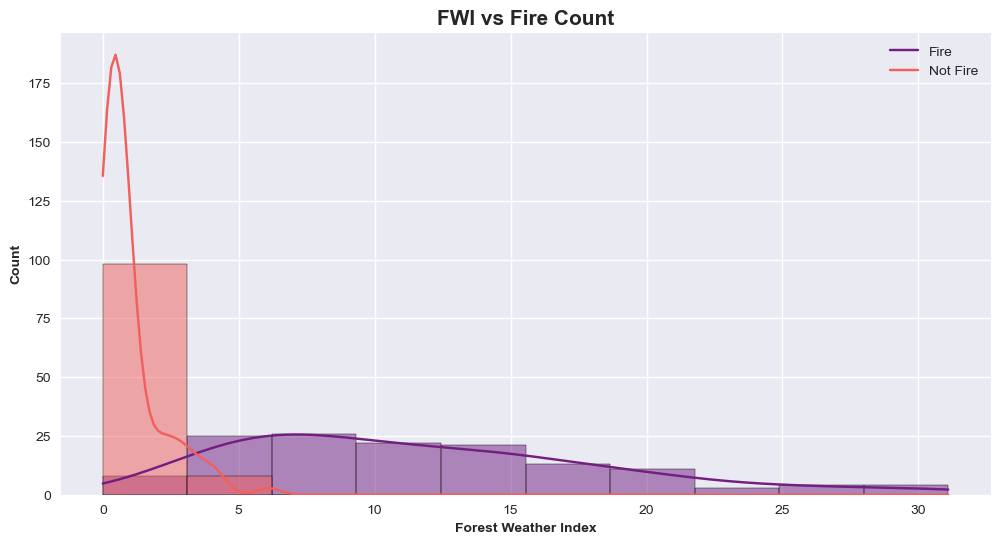

In [218]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'FWI', hue = 'Classes' , data = df_temp, kde = True,  palette = 'magma_r')
plt.title('FWI vs Fire Count' , weight = 'bold' , fontsize = 15)
plt.legend(loc = 'upper right' , labels = ['Fire' , 'Not Fire'])
plt.xlabel('Forest Weather Index' , weight = 'bold' , fontsize = 10)
plt.ylabel('Count' , weight = 'bold' , fontsize = 10)
plt.show()

### ALL OBSERVATIONS AND ENDING OF EDA

##### Temperature -> Highest Fire Count Ranges from Temperature 30 degree to 37 degree Celcius
##### Rain -> Fire Count Occurs when their is no rain Ranges from (0.0 to 0.3)
##### Wind Speed -> Highest Fire Count Ranges from WS 13km/hr to 18km/hr
##### Relative Humidity -> Low Value of Relative Humidity Leads to high Count of Fire (50% to 80%) -> max hai


##### FFMC -> Higher Value of FFMC leads to More Fire Count above 75
#### DMC ->  Lower Value of DMC leads to More Fire Counts above 10
#### DC -> Lower Value of DC leads to More fire Counts above 25
#### ISI -> Lower Value of ISI leads to More fire Counts  above 3
#### BUI -> Lower Value of BUI leads to More Fire Counts  above 10
#### FWI -> Value between ( 3 to 25) their are more chances of Fire Count